# Brain Station-Data Science
**By: Rob Liddell and Candyce Griffin**

This document is an outline of our analysis of spotify song data. The goal of this analysis is to:
1. Identify what makes a song popular
2. Determine if there are unpopular songs which would actually fit in the popular group
3. Can we categorize popular songs?

  
  **artist**:Name of the Artist.
    
  **song**: Name of the Track.
    
  **genre**: Genre of the track.
    
  **duration_ms**: Duration of the track in milliseconds.
    
  **explicit**: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
    
  **year**: Release Year of the track.
    
  **popularity**: Spotify popularity ranges from 0 to 100 and is based on the playback rate, as well as the total and recent amount of listens
    
  **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
    
  **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
  
  **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
  
  **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
    
  **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
        
  **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
  **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
    
  **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    
  **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
    
  **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
  **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

## 1. Description

This notebook is intended to answer questions regarding factors which influence the probability of a song becoming popular. The main hypothesis we would like to answer is:
    
   **We hypothesize** that songs that are positive in character with greater danceability, and energy are more likely to become popular.
    
To answer this main question we have sub hypotheses which we would like to address:
1. Positive music is more likely to be popular.
2. High energy music is more likely to be popular.
3. High danceability music is more likely to be popular.

## 2. Data Loading And Formatting
Loading the data files.

In [513]:
import pandas as pd
import numpy as np

In [564]:
dataFolder='../Data/Cleaning/'
files=['spotifySongData4.csv','genreFamilyMatrix.csv','genreVerboseMatrix.csv']

spotifySongs=pd.read_csv(dataFolder+files[0],index_col=0)
#Changing explicit to an interger to aid with future analysis
spotifySongs['explicit']=spotifySongs['explicit']*1
#establish popular and unpopular songs
popularityCutOff=50
spotifySongs['popBin']=[int(bool(max(0,i-popularityCutOff))) for i in spotifySongs['popularity'] ]

rows_popular=spotifySongs['popBin']==1
rows_unpopular=spotifySongs['popBin']==0


genreFamily=pd.read_csv(dataFolder+files[1],index_col=0)
genreVerbose=pd.read_csv(dataFolder+files[2],index_col=0)

spotifySongs_Keys=pd.get_dummies(spotifySongs['key'], prefix='key')
cols_Keys=spotifySongs_Keys.columns.to_list()

spotifySongs.shape

(12115, 20)

### 2.1 Spotify Song Dataset

In [565]:
spotifySongs.head()

,track_artist,track_name,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genreVerbose,genreFamily,popBin
id,,,,,,,,,,,,,,,,,,,,
0,Britney Spears,Oops!...I Did It Again,211160,0,2000.0,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,pop,1
1,blink-182,All The Small Things,167066,0,1999.0,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock;pop,pop;rock,1
2,Faith Hill,Breathe,250546,0,1999.0,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop;country,pop;country,1
3,Bon Jovi,It's My Life,224493,0,2000.0,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock;metal,rock;metal,1
4,*NSYNC,Bye Bye Bye,200560,0,2000.0,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,pop,1


In [566]:
colsToRemove=['year','track_artist','track_name','genreVerbose','genreFamily']
spotifyFeatures=[i for i in spotifySongs.columns.to_list() if not i in colsToRemove]
for i in spotifyFeatures:
    print(i)

duration_ms
explicit
popularity
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
popBin


### 2.2 Genre Family Matrix

In [567]:
genreFamily.head()

,pop,hip-hop,rock,r&b,soul,reggae,country,funk,folk,jazz,...,disco,classical,electronic,latin,blues,ska,traditional,world,indie,metal
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [568]:
cols_genreFamily=genreFamily.columns.to_list()
print(f"There are {len(cols_genreFamily)} main musical genres:")
for i in cols_genreFamily:
    print(i)

There are 23 main musical genres:
pop
hip-hop
rock
r&b
soul
reggae
country
funk
folk
jazz
rap
other
unknown
disco
classical
electronic
latin
blues
ska
traditional
world
indie
metal


### 2.3 Verbose Genre Matrix

In [569]:
genreVerbose.head()

,21st century classical,acoustic,acoustic pop,adult standards,alabama rap,albanian hip-hop,alberta country,album rock,alternative,alternative country,...,workout product,world,world worship,worship,wyoming indie,wyoming roots,yacht rock,ye ye,zolo,zydeco
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [570]:
cols_genreVerbose=genreVerbose.columns.to_list()
print(f"There are {len(cols_genreVerbose)} total genres:")
for i in cols_genreVerbose:
    print(i)

There are 582 total genres:
21st century classical
acoustic
acoustic pop
adult standards
alabama rap
albanian hip-hop
alberta country
album rock
alternative
alternative country
alternative dance
alternative hip-hop
alternative metal
alternative pop
alternative pop rock
alternative rock
american 21st century classical
anthem worship
arena rock
argentine reggae
argentine rock
arkansas indie
art pop
art rock
asbury park indie
asheville indie
asmr
athens indie
atl hip-hop
atl trap
australian indie
australian metalcore
background
balearic
baltimore hip-hop
banda
banjo
baptist gospel
bass trap
baton rouge rap
bay area hip-hop
bay area indie
beach
beats
bebop
belgian death metal
belgian edm
belgian metal
big band
big room
birmingham hip-hop
bluegrass
blues
blues rock
bmore
bossa nova
brazilian jazz
brill building pop
bristol indie
british blues
british folk
british power metal
british soundtrack
britpop
brutal death metal
bubblegrunge
bubblegum
bubblegum pop
c86
cali rap
canadian classical
ca

## 3. Data Description
### 3.1 Song popularity

In [571]:
nSongs=spotifySongs.shape[0]
popularRate=spotifySongs['popBin'].sum(0)/nSongs


print(f"Data set contains {nSongs} different songs.")
print(f"{round(popularRate*100)}% are popular and {round((1-popularRate)*100)}% unpopular")

Data set contains 12115 different songs.
13% are popular and 87% unpopular


In [572]:
allArtists=spotifySongs['track_artist'].drop_duplicates().to_list()
len(allArtists)
nArtistsWithHits=0
for i in allArtists:
    rows=spotifySongs['track_artist']==i
    if spotifySongs['popBin'][rows].sum(0)>0:
        nArtistsWithHits+=1
print(f"This data set contains {len(allArtists)} different artists")
print(f"{round(nArtistsWithHits/len(allArtists)*100,2)}% have at least one popular songs.")

This data set contains 2775 different artists
25.62% have at least one popular songs.


In [573]:
print(f"Data set contains {len(cols_genreFamily)} different genre families")

nSongs_genreFamily=genreFamily.sum(0)
genreFamilySongs=genreFamily==1

for i in cols_genreFamily:
    genreRate=nSongs_genreFamily[i]/nSongs
    genreSongs=spotifySongs['popBin'][genreFamilySongs[i]]
    genrePopularityRate=nSongs_genreFamily[i]/nSongs
    print(f"Data set is {round(genreRate*100,1)}% {i} songs and {round(genrePopularityRate*100,2)}% are popular")

Data set contains 23 different genre families
Data set is 17.9% pop songs and 17.92% are popular
Data set is 14.5% hip-hop songs and 14.52% are popular
Data set is 9.6% rock songs and 9.57% are popular
Data set is 4.5% r&b songs and 4.49% are popular
Data set is 1.0% soul songs and 1.02% are popular
Data set is 0.3% reggae songs and 0.32% are popular
Data set is 1.4% country songs and 1.39% are popular
Data set is 0.7% funk songs and 0.7% are popular
Data set is 2.0% folk songs and 1.97% are popular
Data set is 1.7% jazz songs and 1.68% are popular
Data set is 9.7% rap songs and 9.74% are popular
Data set is 11.0% other songs and 11.04% are popular
Data set is 41.9% unknown songs and 41.95% are popular
Data set is 0.1% disco songs and 0.15% are popular
Data set is 1.2% classical songs and 1.16% are popular
Data set is 4.0% electronic songs and 4.0% are popular
Data set is 3.0% latin songs and 2.96% are popular
Data set is 1.2% blues songs and 1.19% are popular
Data set is 0.1% ska song

In [574]:
print(f"Data set contains {len(cols_genreVerbose)} different verbose genres")

nSongs_genreVerbose = genreVerbose.sum(0)
genreVerboseSongs = genreVerbose==1

for i in cols_genreVerbose:
    genreRate=nSongs_genreVerbose[i]/nSongs
    genreSongs=spotifySongs['popBin'][genreVerboseSongs[i]]
    genrePopularityRate=nSongs_genreVerbose[i]/nSongs
    print(f"Data set is {round(genreRate*100,1)}% {i} songs and {round(genrePopularityRate*100,2)}% are popular")

Data set contains 582 different verbose genres
Data set is 0.1% 21st century classical songs and 0.08% are popular
Data set is 0.2% acoustic songs and 0.25% are popular
Data set is 0.1% acoustic pop songs and 0.06% are popular
Data set is 0.4% adult standards songs and 0.42% are popular
Data set is 0.0% alabama rap songs and 0.02% are popular
Data set is 0.0% albanian hip-hop songs and 0.01% are popular
Data set is 0.1% alberta country songs and 0.1% are popular
Data set is 0.7% album rock songs and 0.65% are popular
Data set is 0.9% alternative songs and 0.94% are popular
Data set is 0.0% alternative country songs and 0.02% are popular
Data set is 0.2% alternative dance songs and 0.23% are popular
Data set is 0.0% alternative hip-hop songs and 0.01% are popular
Data set is 0.5% alternative metal songs and 0.48% are popular
Data set is 0.1% alternative pop songs and 0.07% are popular
Data set is 0.0% alternative pop rock songs and 0.01% are popular
Data set is 0.3% alternative rock son

### 3.2 Feature Distribution
The graphs below show the density distributions of the features in the spotify data set. Popular songs are in yellow and unpopular songs are blue.

In [575]:
import seaborn as sns
import matplotlib.pyplot as plt

In [576]:
colsToMelt=['track_name']+spotifyFeatures

##Reshape data to allow for easy plotting of all features
data_PlotDist=pd.melt(spotifySongs[colsToMelt],id_vars=['track_name','popBin'],value_vars=spotifyFeatures)

##Removing a few outliers so data is more easily visible
rowsToExclude=(data_PlotDist['variable']=='duration_ms') & (data_PlotDist['value']>1000000)
data_PlotDist.drop(data_PlotDist[rowsToExclude].index,inplace=True)

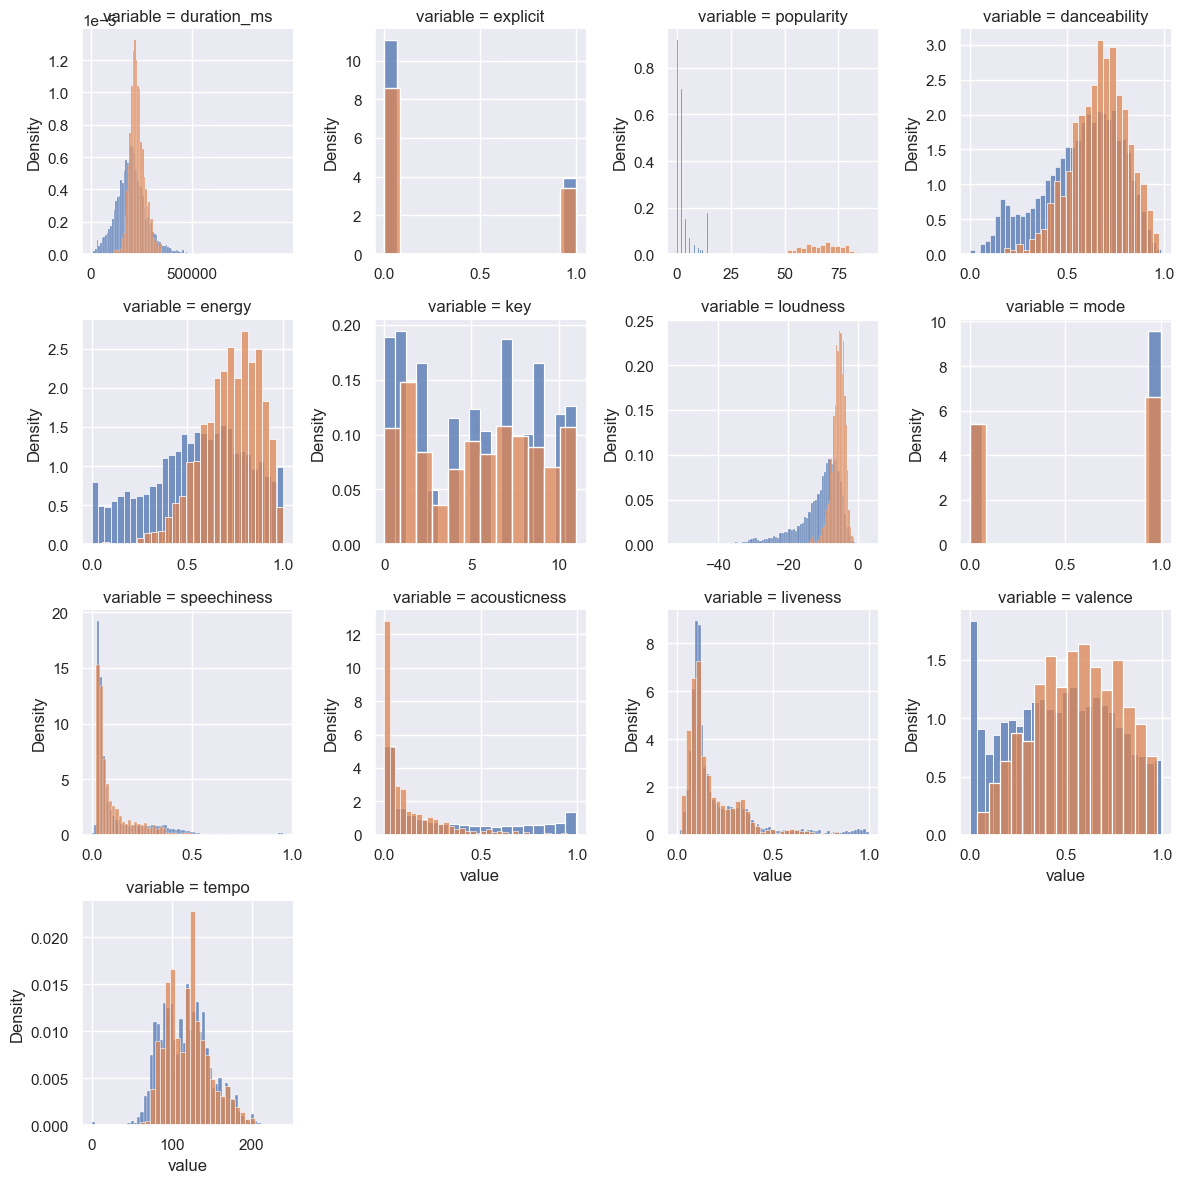

In [527]:
distPlot=sns.FacetGrid(data_PlotDist[data_PlotDist['variable']!='instrumentalness'], col="variable",col_wrap=4,sharex=False,sharey=False,hue='popBin')
distPlot.map(sns.histplot,"value",stat="density")

<AxesSubplot:xlabel='value', ylabel='Density'>

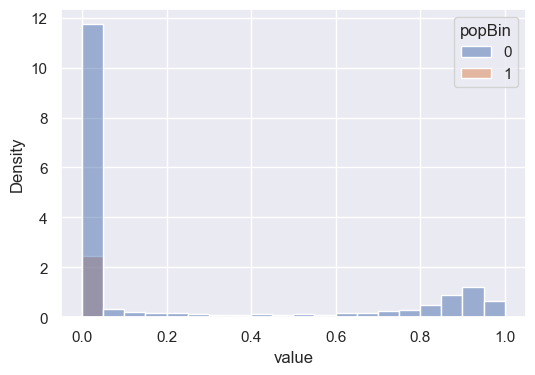

In [528]:
#instrumentalness was plotted by itself due to a peak in density with a significant number of  The data is there, just the spike at 0 is tooooooo strong and hides the rest of the data
ax=sns.histplot(data_PlotDist[data_PlotDist['variable']=='instrumentalness']
                ,x='value',hue='popBin',stat='density',binwidth=0.05)
ax

#### Notes on each variables:
1. Duartion: Popular songs have a tighter distribution 
2. Danceability: Popular songs tend to have greater danceability
3. Energy: Popular songs tend to have higher energy 
4. Loudness: Popular songs tend to be louder
5. Acousticness: Popular songs tend to not be acoustic but instead include more syth and electric instruments
6. Valence (positivity): Popular songs tend to be more chearful
7. Instrumental: Popular songs tend not to be purely instrumental

## 4. Comparing Features By Popular and Unpopular Songs

### 4.1 Logistic Regression

In [577]:
lgrg2 = linear_model.LogisticRegression(solver='liblinear')
X = spotifySongs[['danceability','energy','loudness','liveness']]
Y = (spotifySongs['popularity']>50)*1
lgrg2.fit(X,Y)

LogisticRegression(solver='liblinear')

In [578]:
lgrg2.coef_

array([[ 2.04539439, -1.09384948,  0.47391575, -0.93322774]])

In [579]:
pd.DataFrame(np.exp(lgrg2.coef_[0]),columns=['OddsRatio'],index=lgrg2.feature_names_in_)

,OddsRatio
danceability,7.732207
energy,0.334925
loudness,1.606272
liveness,0.393282


### 4.2 Group mean Comparisons by t-test

In [529]:
from scipy import stats
checkThese=['duration_ms','danceability','energy','loudness','acousticness','valence','instrumentalness']

def addTabs(string,maxTabs):
    nTabs=int(((len(string))/8))
    return (maxTabs-nTabs)*"\t"

print("Feature:\t\tMeans:pop. vs. unpop.\t\t%Diff\tTStat\tP-Val")    

for i in spotifyFeatures:
    #Features to exclude from this type of testing
    if i in ['popularity','popBin','key']:
        continue
    
    a=spotifySongs[i][rows_popular]
    b=spotifySongs[i][rows_unpopular]
    mean_a=round(np.mean(a),2)
    mean_b=round(np.mean(b),2)
    testResult=stats.ttest_ind(a,b,axis=0,equal_var=False,permutations=10000,random_state=46)

    string_Features=i
    string_Features+=addTabs(string_Features,3)
    
    string_Means=str(mean_a)+" vs. "+str(mean_b)
    string_Means+=addTabs(string_Means,4)
    
    string_PDiff=str(int(abs(mean_a-mean_b)/((mean_a+mean_b)/2)*100))
    string_PDiff+=addTabs(string_PDiff,1)
    
    string_TStat=str(round(testResult[0],2))
    string_TStat+=addTabs(string_TStat,1)
    
    string_PVal=str(testResult[1])
    print(f"{string_Features}{string_Means}{string_PDiff}{string_TStat}{string_PVal}")

    

Feature:		Means:pop. vs. unpop.		%Diff	TStat	P-Val
duration_ms		229931.88 vs. 206923.66		10	15.98	0.0
explicit		0.29 vs. 0.26			10	1.88	0.0644
danceability		0.67 vs. 0.57			16	22.62	0.0
energy			0.72 vs. 0.56			24	36.35	0.0
loudness		-5.5 vs. -11.21			-68	69.03	0.0
mode			0.55 vs. 0.64			15	-6.67	0.0
speechiness		0.11 vs. 0.14			24	-10.28	0.0
acousticness		0.13 vs. 0.35			91	-39.69	0.0
instrumentalness	0.01 vs. 0.23			183	-51.95	0.0
liveness		0.18 vs. 0.21			15	-7.72	0.0
valence			0.56 vs. 0.47			17	14.22	0.0
tempo			120.41 vs. 117.78		2	3.49	0.0005


For the above tests we used a permutation test as the allows for the test to be robust against different sample distributions.

The only metric above which we lack sufficient evidence to reject the null hypothesis (Ho: That popular and unpopular music is similar) is explicit language. Otherwise all other groups we tested are significantly different. However many of these groups could be argued to have differences which are immaterial. 

Of these variables we can highlight **loudness, acousticness, instrumentalness, energy,** and **speechiness** as having significant and sizable differences between the popular and unpopular groups.

## Conclusions with Respect to Hypotheses:
1. Positive music is more likely to be popular.

While having statistical significance and being higher for popular music the percent difference was smaller at 17%

2. High energy music is more likely to be popular.

Popular music had an energy level 24% higher

3. High danceability music is more likely to be popular.

Popular music was 16% more dancable


## 5. Classification

### 5.1 Feature Correlations

<AxesSubplot:>

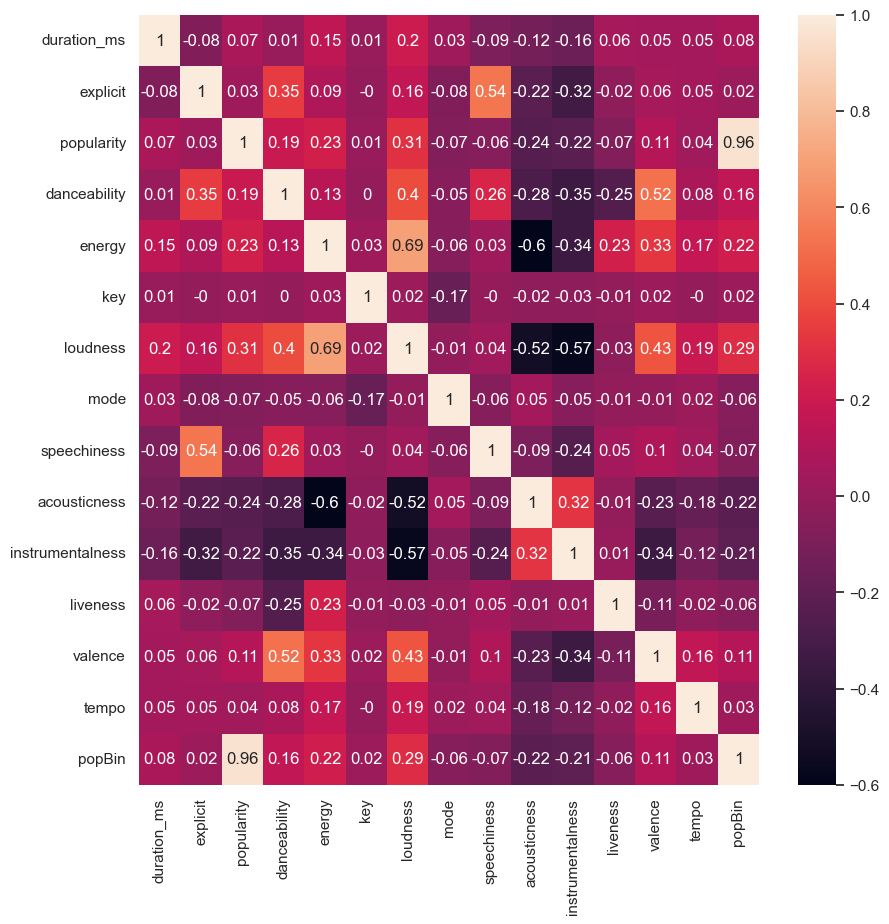

In [534]:
f, axs = plt.subplots(1,1,figsize=(10, 10))
sns.heatmap(round(spotifySongs[spotifyFeatures].corr(),2),annot=True)

#### Correlation Notes:
1. Popularity and the popBin have high correlation as expected (0.96)
2. Loudness is correlated with energy (0.69) and negatively correlated with instrumentalness (-0.57)
3. Explicity content is correlated with high speachiness in a song (0.54)
4. Valence and Danceability have a correlation of (0.52)
5. Acousticness is negatively correlated with energy (-0.6) and loudness(-0.52)

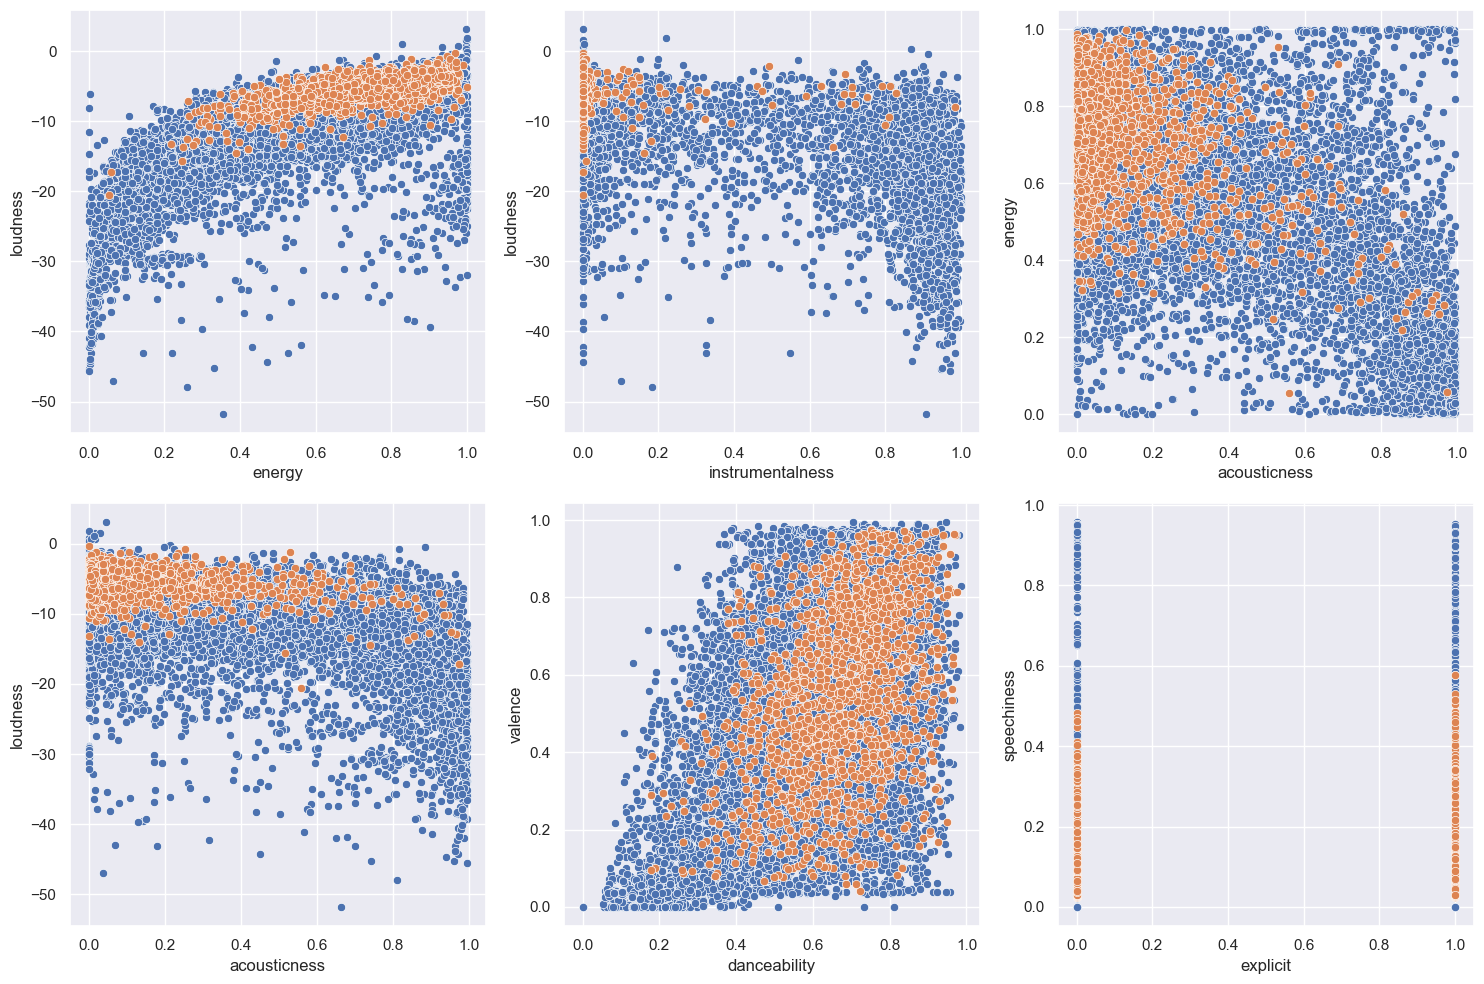

In [585]:
correlationPlotsList=[['loudness','energy'],['loudness','instrumentalness'],['energy','acousticness'],
                      ['loudness','acousticness'],['valence','danceability'],['speechiness','explicit']]

nCols=3
nRows=int(6/nCols)

f, axs = plt.subplots(nRows,nCols,figsize=(5*nCols, 5*nRows))



for i,j in enumerate(correlationPlotsList):
    axsY=int(i/nCols)
    axsX=i%nCols
    sns.scatterplot(spotifySongs[spotifySongs['popBin']==0],y=j[0],x=j[1], ax=axs[axsY][axsX])
    sns.scatterplot(spotifySongs[spotifySongs['popBin']==1],y=j[0],x=j[1], ax=axs[axsY][axsX])

    
f.tight_layout()


### 5.1 Popularity Decision Tree - Full Genre Coding

In [532]:
from scipy import special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection, tree

In [415]:
#Combine Data Frames for Data Set
decisionTreeDataSet=pd.concat([spotifySongs,genreFamily,spotifySongs_Keys],axis=1)

#Establish Training Data
trainSongs, testSongs = model_selection.train_test_split(decisionTreeDataSet, random_state=4646,stratify=decisionTreeDataSet['popBin']) 


fitOnThese=spotifyFeatures+cols_genreFamily+cols_Keys
colsToExclude=['popularity','popBin','key']
for i in colsToExclude:
    fitOnThese.remove(i)

XtrainSongs=trainSongs[fitOnThese] # Select the variables of interest to fit
ytrainSongs=trainSongs['popBin']

XtestSongs=testSongs[fitOnThese] # Select the variables of interest to fit
ytestSongs=testSongs['popBin']

In [416]:
# Define a range of depth values to try
depth_values = range(1, 20)

# Create placeholder lists to append our scores to
train_scores = []
test_scores = []


# Loop through each depth value
for d in depth_values:

    # Create and fit a decision tree with that depth
    dt = tree.DecisionTreeClassifier(max_depth=d)
    dt.fit(XtrainSongs, ytrainSongs)

    # Calculate train and test accuracies
    train_acc = dt.score(XtrainSongs, ytrainSongs)
    test_acc = dt.score(XtestSongs, ytestSongs)

    # Append them to our lists
    train_scores.append(train_acc)
    test_scores.append(test_acc)

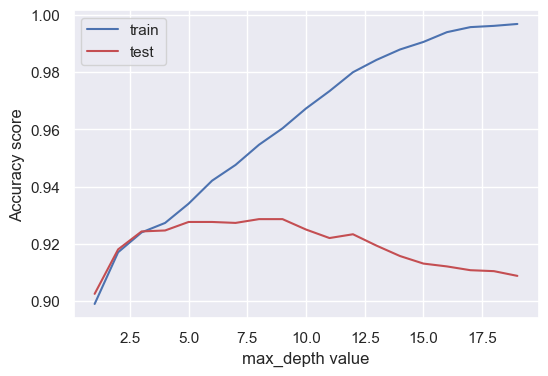

In [417]:
plt.figure()
plt.plot(depth_values, train_scores, label='train')
plt.plot(depth_values, test_scores, label='test', c='r')
plt.xlabel('max_depth value')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

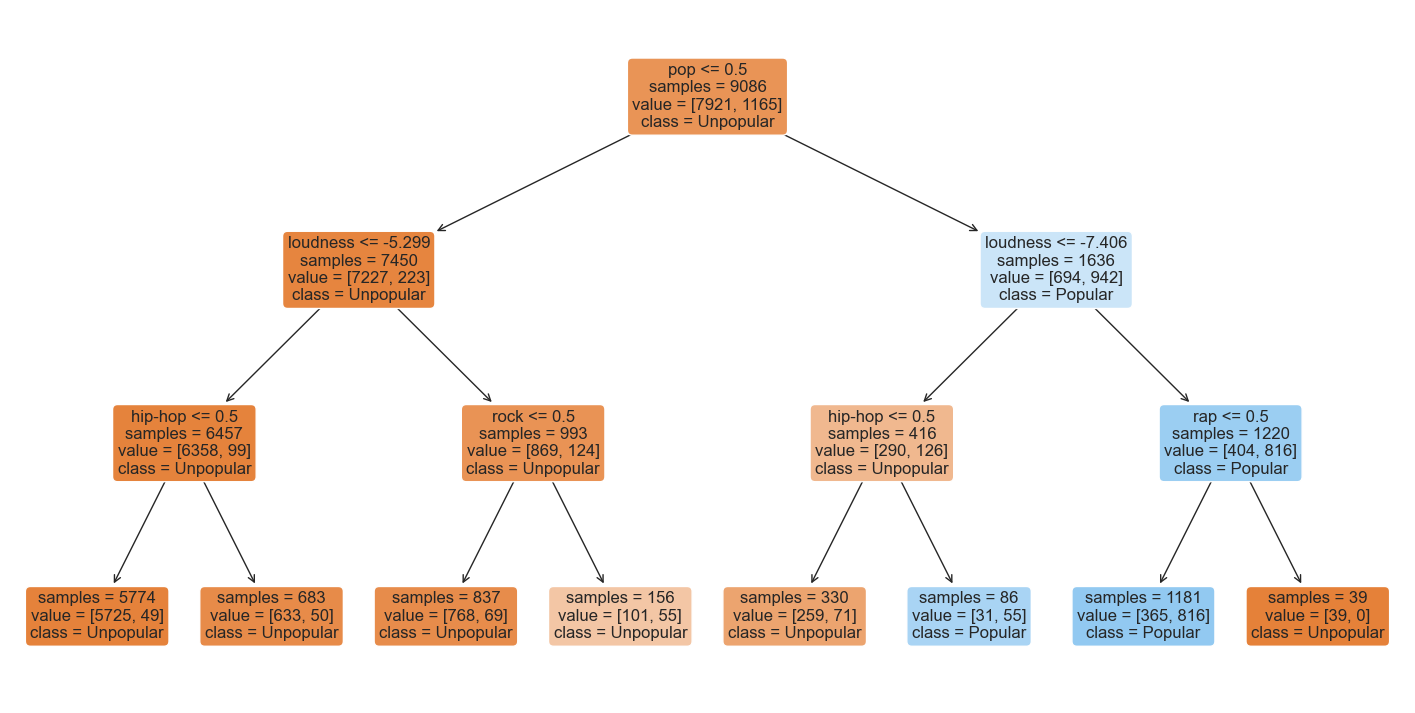

In [418]:
from sklearn.tree import plot_tree

best_tree = tree.DecisionTreeClassifier(max_depth=3)
best_tree.fit(XtrainSongs, ytrainSongs)
best_tree.score(XtestSongs, ytestSongs)

# size for our tree figure
fig, ax = plt.subplots(figsize=(18, 9))

# Use sklearn's plot_tree() function
plot_tree(best_tree,
          feature_names = XtrainSongs.columns,
          class_names = ['Unpopular', 'Popular'],
          rounded=True,
          impurity=False,
          filled=True,
          ax=ax,
          fontsize=12);


#In The Tree Left is True, and Right is False in terms of answering the true false question
#Trees dont necessarily give the best result but its easily interpretable to easily segment

In [419]:
#Create Confusion Matrix
conf_matrix = metrics.confusion_matrix(ytestSongs, best_tree.predict(XtestSongs),labels=[1,0])
print(conf_matrix)
print(f"Predict:  Popular Is:  Popular  {conf_matrix[0,0]}")
print(f"Predict:Unpopular Is:Unpopular  {conf_matrix[1,1]}")
print(f"Predict:  Popular Is:Unpopular  {conf_matrix[1,0]}")
print(f"Predict:Unpopular Is:  Popular  {conf_matrix[0,1]}")

[[ 287  101]
 [ 128 2513]]
Predict:  Popular Is:  Popular  287
Predict:Unpopular Is:Unpopular  2513
Predict:  Popular Is:Unpopular  128
Predict:Unpopular Is:  Popular  101


Confusion Matrix Results:

|                      |Predicted: Popular |  Predicted: Unpopular|
|---------------------:|:---------------------:|:---------------:|
| **Actually Popular** |         287          |      101         | 
|**Actually Unpopular**|            128        |        2513        |



In [420]:
print(f"Popular Prediction Accuracy: {round(conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0]),2)}")

Popular Prediction Accuracy: 0.69


### 5.2 Decision Tree - Fractional Genre Coding With Cross Validation

The factional coding means that if something is multiple genre then each part contributes to a fraction of the whole.
Being pop and hip-hop makes a song 50% each category

In [550]:
genreFamily.head()

,pop,hip-hop,rock,r&b,soul,reggae,country,funk,folk,jazz,...,disco,classical,electronic,latin,blues,ska,traditional,world,indie,metal
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [551]:
genreFamily_Fractional=genreFamily.div(genreFamily.sum(1),axis='index').copy()
genreFamily_Fractional.head()

,pop,hip-hop,rock,r&b,soul,reggae,country,funk,folk,jazz,...,disco,classical,electronic,latin,blues,ska,traditional,world,indie,metal
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [541]:


#Combine Data Frames for Data Set
decisionTreeDataSetFrac=pd.concat([spotifySongs,genreFamily_Fractional,spotifySongs_Keys],axis=1)

fitOnThese=spotifyFeatures+cols_genreFamily+cols_Keys
colsToExclude=['popularity','popBin','key']
for i in colsToExclude:
    fitOnThese.remove(i)

kf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=24)



# Define a range of depth values to try
depth_values = range(1, 20)

mean_train_scores = []
mean_test_scores = []

for d in depth_values:
    train_scores = []
    test_scores = []
    for (trainIndex, testIndex) in kf.split(decisionTreeDataSetFrac,decisionTreeDataSetFrac['popBin']):
        
        XtrainSongsFrac=decisionTreeDataSetFrac[fitOnThese].iloc[trainIndex] # Select the variables of interest to fit
        ytrainSongsFrac=decisionTreeDataSetFrac['popBin'].iloc[trainIndex]

        XtestSongsFrac=decisionTreeDataSetFrac[fitOnThese].iloc[testIndex] # Select the variables of interest to fit
        ytestSongsFrac=decisionTreeDataSetFrac['popBin'].iloc[testIndex]
        
        # Create and fit a decision tree with that depth
        dt = tree.DecisionTreeClassifier(max_depth=d)
        dt.fit(XtrainSongsFrac, ytrainSongsFrac)

        # Calculate train and test accuracies
        train_acc = dt.score(XtrainSongsFrac, ytrainSongsFrac)
        test_acc = dt.score(XtestSongsFrac, ytestSongsFrac)

        # Append them to our lists
        train_scores.append(train_acc)
        test_scores.append(test_acc)
        
    mean_train_scores.append(np.mean(train_scores))
    mean_test_scores.append(np.mean(test_scores))


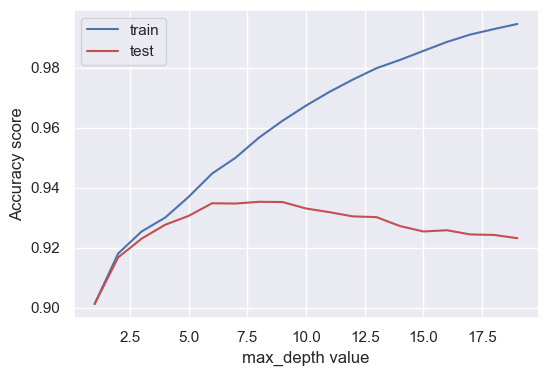

In [542]:
plt.figure()
plt.plot(depth_values, mean_train_scores, label='train')
plt.plot(depth_values, mean_test_scores, label='test', c='r')
plt.xlabel('max_depth value')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

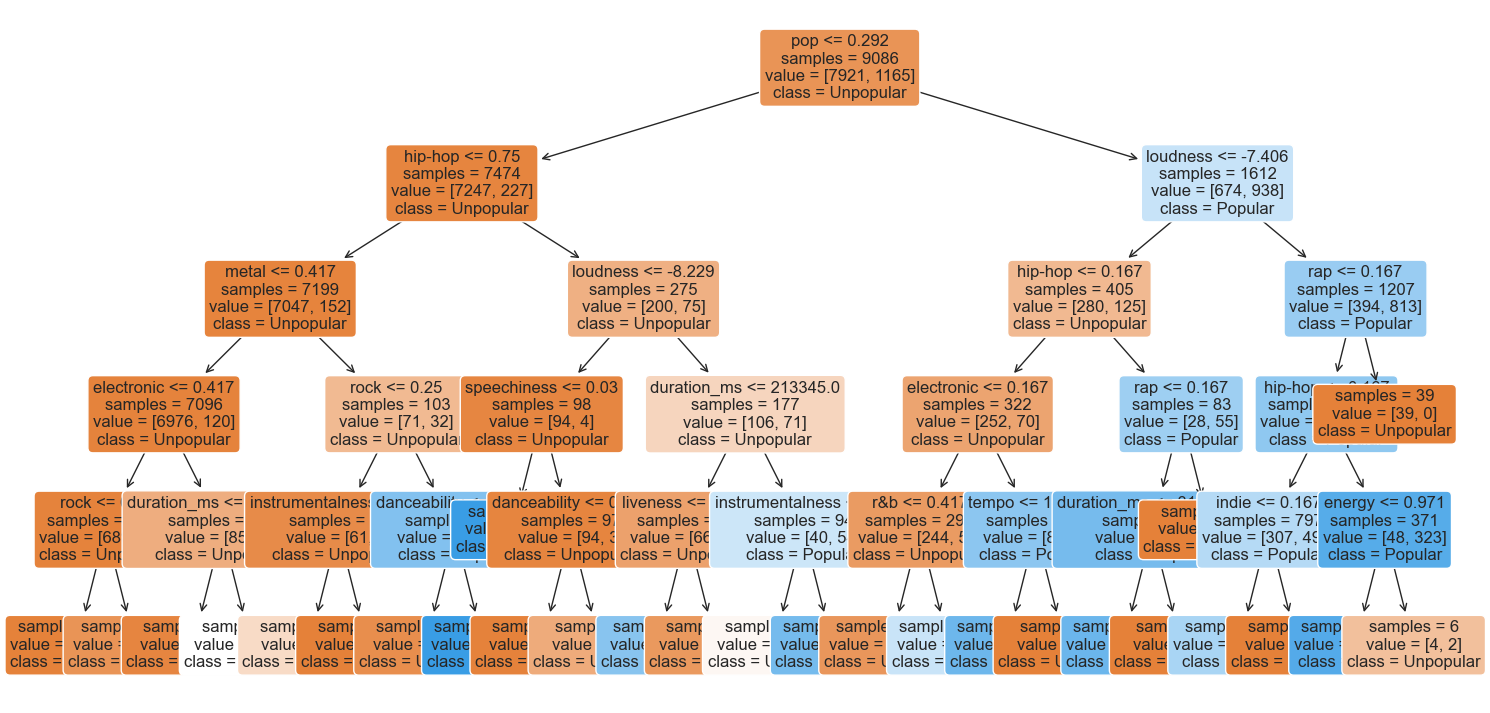

In [543]:
best_treeFrac = tree.DecisionTreeClassifier(max_depth=6)
best_treeFrac.fit(XtrainSongsFrac, ytrainSongsFrac)
best_treeFrac.score(XtestSongsFrac, ytestSongsFrac)

# size for our tree figure
fig, ax = plt.subplots(figsize=(18, 9))

# Use sklearn's plot_tree() function
plot_tree(best_tree,
          feature_names = XtrainSongsFrac.columns,
          class_names = ['Unpopular', 'Popular'],
          rounded=True,
          impurity=False,
          filled=True,
          ax=ax,
          fontsize=12);


#In The Tree Left is True, and Right is False in terms of answering the true false question
#Trees dont necessarily give the best result but its easily interpretable to easily segment

In [544]:
#Create Confusion Matrix
conf_matrixFrac = metrics.confusion_matrix(ytestSongsFrac, best_tree.predict(XtestSongsFrac),labels=[1,0])
print(conf_matrix)
print(f"Predict:  Popular Is:  Popular  {conf_matrix[0,0]}")
print(f"Predict:Unpopular Is:Unpopular  {conf_matrix[1,1]}")
print(f"Predict:  Popular Is:Unpopular  {conf_matrix[1,0]}")
print(f"Predict:Unpopular Is:  Popular  {conf_matrix[0,1]}")

[[ 293   95]
 [  79 2562]]
Predict:  Popular Is:  Popular  293
Predict:Unpopular Is:Unpopular  2562
Predict:  Popular Is:Unpopular  79
Predict:Unpopular Is:  Popular  95


Confusion Matrix Results:

|                      |Predicted: Popular |  Predicted: Unpopular|
|---------------------:|:---------------------:|:---------------:|
| **Actually Popular** |         293          |      79         | 
|**Actually Unpopular**|           79       |        2562        |


In [546]:
print(f"Popular Prediction Accuracy: {round(conf_matrixFrac[0,0]/(conf_matrixFrac[0,0]+conf_matrixFrac[1,0]),2)}")

Popular Prediction Accuracy: 0.73


## 6. Extra: Random Forrest

In [466]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, min_samples_split=2)
clf.fit(XtrainSongsFrac, ytrainSongsFrac)

RandomForestClassifier()

In [467]:
#Create Confusion Matrix
conf_matrix = metrics.confusion_matrix(ytestSongsFrac, clf.predict(XtestSongsFrac),labels=[1,0])
print(conf_matrix)
print(f"Predict:  Popular Is:  Popular  {conf_matrix[0,0]}")
print(f"Predict:Unpopular Is:Unpopular  {conf_matrix[1,1]}")
print(f"Predict:  Popular Is:Unpopular  {conf_matrix[1,0]}")
print(f"Predict:Unpopular Is:  Popular  {conf_matrix[0,1]}")

[[ 293   95]
 [  79 2562]]
Predict:  Popular Is:  Popular  293
Predict:Unpopular Is:Unpopular  2562
Predict:  Popular Is:Unpopular  79
Predict:Unpopular Is:  Popular  95


In [547]:
print(f"Popular Prediction Accuracy: {round(conf_matrixFrac[0,0]/(conf_matrixFrac[0,0]+conf_matrixFrac[1,0]),2)}")

Popular Prediction Accuracy: 0.73


## 7. Extra: Principal Component Analysis -Unfinished


In [427]:
#Libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [428]:
#Scaling data to be uniform for effective PCA analysis

fitOnThese=spotifyFeatures.copy()
for i in ['popBin','popularity']:
    fitOnThese.remove(i)

scaler=StandardScaler()
scaledSongData=pd.DataFrame(scaler.fit_transform(spotifySongs[fitOnThese]),columns=fitOnThese)
scaledSongData.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.012703,-0.601793,0.828208,1.017395,-1.170903,0.757026,-1.299705,-0.578446,-0.058715,-0.573716,0.795641,1.545207,-0.755743
1,-0.422518,-0.601793,-0.766567,1.266800,-1.447122,0.836156,0.769405,-0.544933,-0.932891,-0.573767,2.186983,0.764251,1.002714
2,0.401454,-0.601793,-0.288638,-0.320678,0.486410,0.221014,0.769405,-0.675045,-0.441940,-0.573767,0.232608,-0.745599,0.613923
3,0.144303,-0.601793,-0.177960,1.330140,-1.447122,0.964781,-1.299705,-0.559390,-0.884611,-0.573728,0.752331,0.243613,0.061319
4,-0.091923,-0.601793,0.138983,1.389522,0.762628,0.853005,-1.299705,-0.526533,-0.840857,-0.570806,-0.668786,1.489425,1.786719


In [430]:
import re
def firstGenreExtract(string):
    strMatch=re.match("^.*?(?=;)",string)
    if strMatch:
        return strMatch[0]
    return(string)


pca=PCA(n_components=2)
principalComponents = pca.fit_transform(scaledSongData[fitOnThese])

principalComponentsDF = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


pcaSpotifySongs = pd.concat([principalComponentsDF, spotifySongs['popBin']],axis=1)
pcaSpotifySongs['firstGenre']=[firstGenreExtract(i) for i in spotifySongs['genreFamily']]
pcaSpotifySongs.head()

,principal component 1,principal component 2,popBin,firstGenre
0,-1.424328,0.815775,1,pop
1,-1.220256,2.095582,1,pop
2,0.121368,1.046964,1,pop
3,-1.311021,1.542806,1,rock
4,-2.122706,1.188074,1,pop


<AxesSubplot:title={'center':'2 component PCA'}, xlabel='Principal Component 1', ylabel='Principal Component 2'>

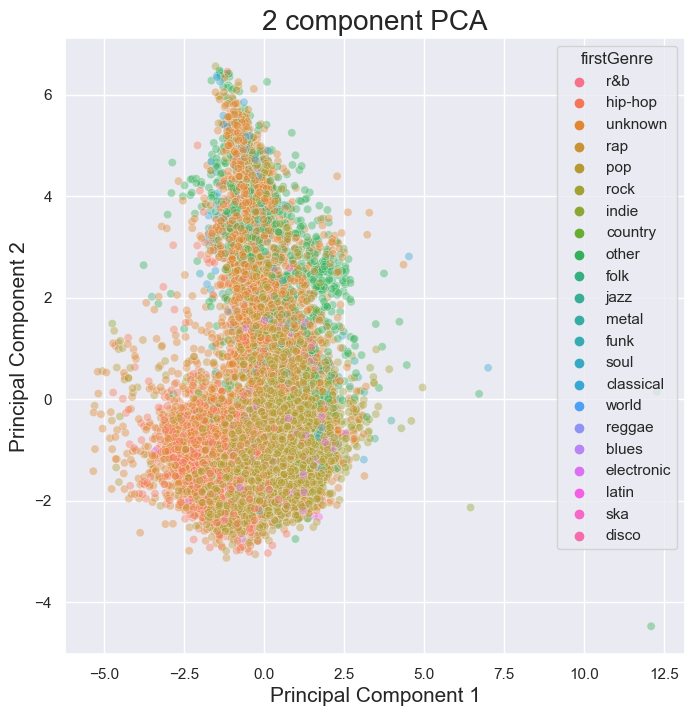

In [439]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


sns.scatterplot(pcaSpotifySongs.iloc[::-1], y="principal component 1",x="principal component 2",
                legend="full",hue='firstGenre',alpha=0.4)    

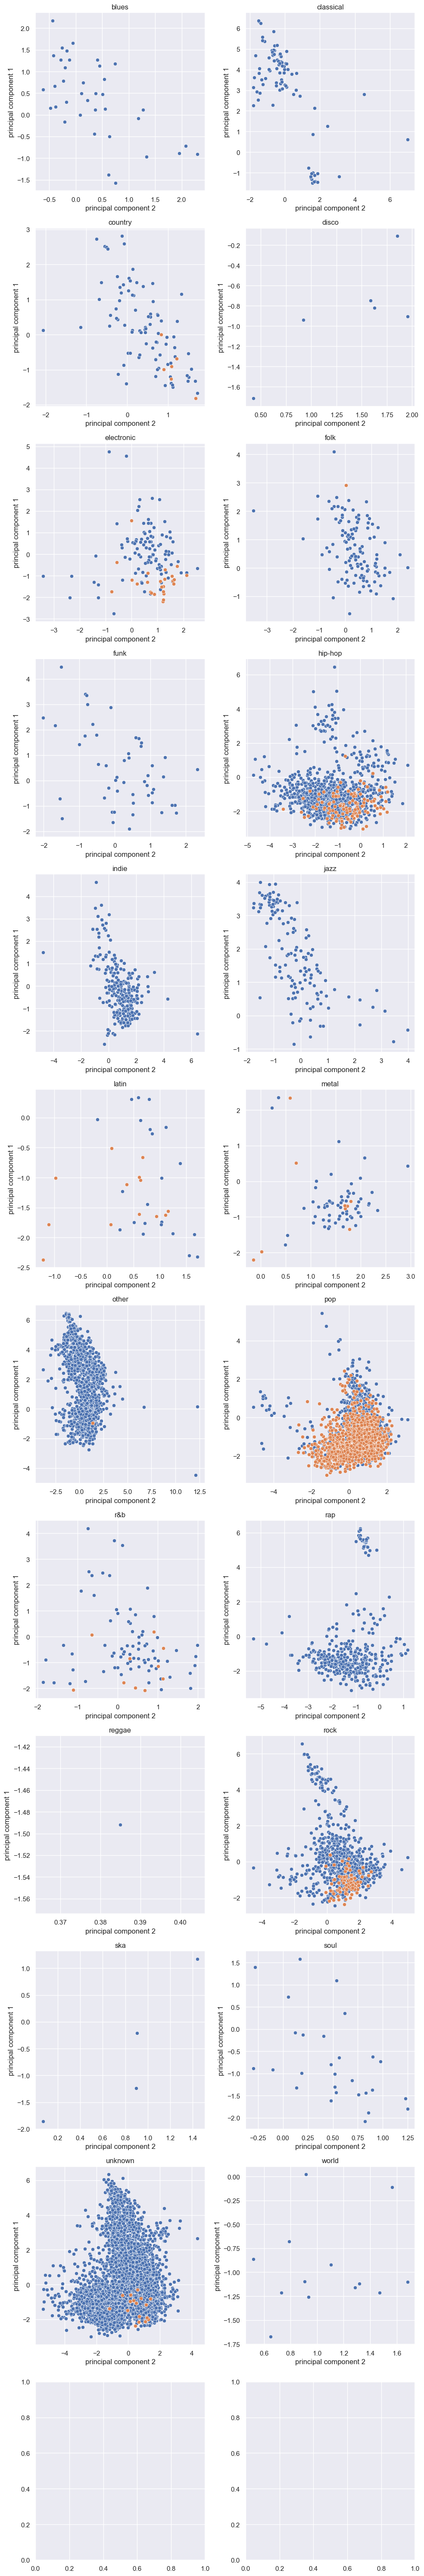

In [454]:
nCols=2
nRows=int(24/nCols)

f, axs = plt.subplots(nRows,nCols,figsize=(5*nCols, 5*nRows))



for i,j in enumerate(np.unique(pcaSpotifySongs['firstGenre']).tolist()):
    axsY=int(i/nCols)
    axsX=i%nCols
    plotData=pcaSpotifySongs[pcaSpotifySongs['firstGenre']==j]
    sns.scatterplot(plotData[plotData['popBin']==0],y="principal component 1",x="principal component 2", ax=axs[axsY][axsX])
    sns.scatterplot(plotData[plotData['popBin']==1],y="principal component 1",x="principal component 2", ax=axs[axsY][axsX])
    axs[axsY][axsX].set_title(j)

    
f.tight_layout()
